## Keras Linear Regression with Callbacks

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

### Step 1. Make random data

In [ ]:
def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)

### Display data

In [ ]:
x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

### Make training and test data

In [16]:
epoch=100
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

### Step 2-3. Sequential Model, Loss, Optimizer

In [1]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.summary()
model.compile(optimizer='sgd', loss='mse')

NameError: name 'tf' is not defined

### Callback setup

In [ ]:
callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                    monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(patience=5)]

### Step 4. Training the Model with  Callbacks

In [18]:
history = model.fit(x_train, y_train, epochs=100,
                    validation_split=0.2, callbacks=callback_list)

Epoch 1/100
4/4 [==============================] - 0s 20ms/step - loss: 10.9325 - val_loss: 6.0695
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 9.0268 - val_loss: 4.9821
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 7.4905 - val_loss: 4.1158
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 6.2374 - val_loss: 3.4229
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 5.2241 - val_loss: 2.8699
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 4.4002 - val_loss: 2.4222
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 3.7243 - val_loss: 2.0660
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: 3.1836 - val_loss: 1.7869
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 2.7433 - val_loss: 1.5592
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 2.3760 - val_loss: 1.3782
Epoch 11/100
4/4 [==

### Step 5. Test the Model

In [19]:
test_loss = model.evaluate(x_test, y_test, verbose=2)
print('test_loss = ', test_loss)

2/2 - 0s - loss: 0.9569
test_loss =  0.9569001197814941


###  Display Training & Validataion Losses

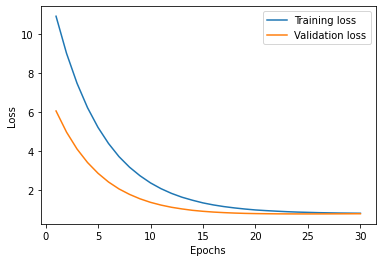

In [20]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Display the Regression Result

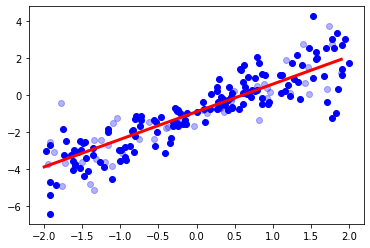

In [21]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()
